### Density-based spatial clustering of applications with noise (DBSCAN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
%matplotlib inline

### Drawback of K-means: Cannot handle non-spherical data

> *K-means* clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with **the nearest mean**. (Wikipedia) 

Since the concentric circles would have the approximately same mean, so k-means is not suitable to separate them.

Let's generate non-spherical data and plot the ground truths of clusters.

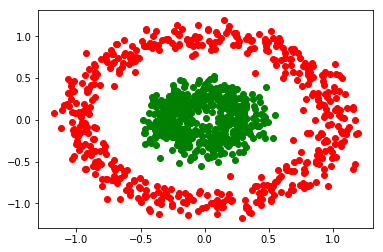

In [2]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

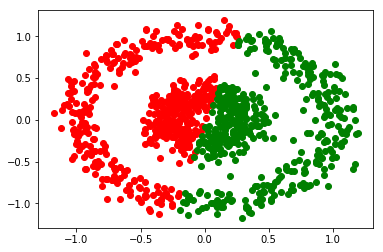

In [3]:
y_pred = KMeans(n_clusters=2, random_state=11).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.

### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

<div style="text-align:center"><img width="300px" src="img/core-border-point.png"/></div>


- Directly density-reachable: A point $p$ is **directly density-reachable** from a point $q$ w.r.t $Eps$ and $MinPts$ if:
    - $p \in N_{Eps}(q)$, and $q$ is a **core point**.
    - $p$ **doesn't** need to be a core point.

<div style="text-align:center"><img width="250px" src="img/directly-density-reachable.png"/></div>

- Density-reachable: A point $p$ is **density-reachable** from a point $q$ w.r.t. $Eps$ and $MinPts$ if there is a chain of points $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ such that $p_{i+1}$ is directly density-reachable from $p_i$.

<div style="text-align:center"><img width="150px" src="img/density-reachable.png"/></div>

### The Algorithm
1. Randomly choose a point $p$.
2. Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
3. If $p$ is a core point, a cluster is formed.
4. If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
5. Repeat the process until all the data points have been processed.

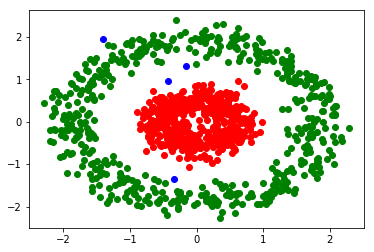

In [4]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')
plt.plot(X[y_pred == -1, 0], X[y_pred == -1, 1], 'bo')


### Please complete the following tasks:
- Implement *DBSCAN* algorithm yourself.
- Apply the implemented *DBSCAN* algorithm on the given training data.
- Plot the clusters.

In [6]:
from numpy.linalg import norm

class DBScan():
    def __init__(self):
        pass
    
    def fit_predict(self, X, eps = 0.3, min_samples =10):
        C = 0
        label = np.ones(X.shape[0]) * -1
        points = list(range(0, X.shape[0]))
        while len(points) != 0:
            i = np.random.choice(points, 1)
            if label[i] != -1:
                points.remove(i)
                continue
            N = self.find_neighbours(X, eps, X[i], label)
            if len(N) < min_samples:
                label[i] = -2 # noise
                continue
            C += 1
            points.remove(i) #remove points
            label[i] = C
            S = N
            S.remove(i) #remove point from list
            while len(S) != 0:
                if label[S[0]] == -2: #if it was nosiy marked it 
                    label[S[0]] = C
                if label[S[0]] != -1:
                    S.remove(S[0])
                    continue
                label[S[0]] = C
                N2 = self.find_neighbours(X, eps, X[S[0]], label)                
                if len(N2) >= min_samples:
                    S = list(np.union1d(N2, S))
                S.remove(S[0])
        return label
    
    def find_neighbours(self, X, eps, p, labels):
        neighbours = []
        for i in range(len(X)):
            if norm(p - X[i]) <= eps and labels[i]==-1:
                neighbours.append(i)
        return neighbours
        
        

In [7]:
model = DBScan()
y_pred = model.fit_predict(X,eps=0.3, min_samples=5)

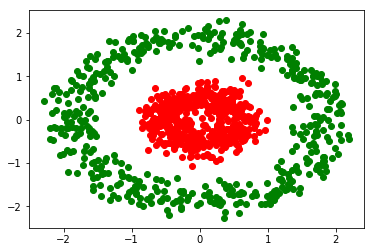

In [8]:
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'ro')
plt.plot(X[y_pred == 2, 0], X[y_pred == 2, 1], 'go')